# Exploration of churn data
Goals:
1. load data and make sure it is clean
2. split data into churned and non-churned data
3. characterize the subsets of the data

In [1]:
# import modules and data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_telco = pd.read_csv('churn_data.csv')

In [3]:
df_telco

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,avg_monthly_charges,avg_bool_check,contract_type.1,phone_type,internet_type
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,...,False,True,True,True,3,65.6,TRUE,1 Year,One Line,DSL
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,...,False,True,True,True,0,59.9,TRUE,Month-to-Month,Two or More Lines,Fiber Optic
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,...,True,True,True,True,0,73.9,TRUE,Month-to-Month,One Line,DSL
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,...,True,True,True,True,1,98,TRUE,Month-to-Month,One Line,DSL
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,...,True,True,True,True,1,83.9,TRUE,Month-to-Month,One Line,DSL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,55.15,...,False,True,True,True,0,55.15,TRUE,1 Year,One Line,DSL
7045,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,85.10,...,True,True,True,True,1,85.1,TRUE,Month-to-Month,Two or More Lines,Fiber Optic
7046,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,50.30,...,False,True,True,True,0,50.3,TRUE,Month-to-Month,One Line,DSL
7047,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,67.85,...,False,True,True,True,3,67.85,TRUE,2 Year,One Line,DSL


In [4]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7049 non-null   object 
 1   gender                  7049 non-null   object 
 2   is_senior_citizen       7049 non-null   int64  
 3   partner                 7049 non-null   object 
 4   dependents              7049 non-null   object 
 5   phone_service           7049 non-null   int64  
 6   internet_service        7049 non-null   int64  
 7   contract_type           7049 non-null   int64  
 8   payment_type            7049 non-null   object 
 9   monthly_charges         7049 non-null   float64
 10  total_charges           7038 non-null   float64
 11  churn                   7049 non-null   object 
 12  tenure                  7049 non-null   float64
 13  rounded_tenure          7049 non-null   float64
 14  service_type            7049 non-null   

Data looks pretty clean.  No rows have null data. But can drop some of the columns to clean the data a little.
Justification for column drops:
- is_female : just use gender
- avg_monthly_charges : can be calculated easily
- avg_bool_check : only a check on the calculation
- contract_type, phone_service, internet_service : covered by contract_type1 (rename this as contract_type), phone_type, internet_type
- rounded_tenure : was only used in the spreadsheets exercise
- partner_dependents : covered by partner and dependents

In [5]:
df_telco.drop(columns = [
    'is_female', 
    'avg_monthly_charges', 
    'avg_bool_check', 
    'contract_type', 
    'phone_service', 
    'internet_service',
    'rounded_tenure',
    'partner_dependents'
], inplace = True)
df_telco.rename(columns={'contract_type.1': 'contract_type'}, inplace=True)

In [6]:
# add a boolean column for senior citizen
df_telco['is_senior_bool'] = df_telco['is_senior_citizen']==1
df_telco
#make a column with automatic payment
df_telco['automatic_payment'] = df_telco.payment_type.str.contains('automatic')
df_telco
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7049 non-null   object 
 1   gender                  7049 non-null   object 
 2   is_senior_citizen       7049 non-null   int64  
 3   partner                 7049 non-null   object 
 4   dependents              7049 non-null   object 
 5   payment_type            7049 non-null   object 
 6   monthly_charges         7049 non-null   float64
 7   total_charges           7038 non-null   float64
 8   churn                   7049 non-null   object 
 9   tenure                  7049 non-null   float64
 10  service_type            7049 non-null   object 
 11  has_churned             7049 non-null   bool   
 12  has_phone               7049 non-null   bool   
 13  has_internet            7049 non-null   bool   
 14  has_phone_and_internet  7049 non-null   

Split the data into customers who have churned one ones who have not.
df_churned := customers who churned
df_unchurned := customers who have not churned

In [7]:
df_churned = df_telco[df_telco.churn == 'Yes']
df_churned

,customer_id,gender,is_senior_citizen,partner,dependents,payment_type,monthly_charges,total_charges,churn,tenure,service_type,has_churned,has_phone,has_internet,has_phone_and_internet,contract_type,phone_type,internet_type,is_senior_bool,automatic_payment
2,0004-TLHLJ,Male,0,No,No,Electronic check,73.90,280.85,Yes,3.8,internet+phone,True,True,True,True,Month-to-Month,One Line,DSL,False,False
3,0011-IGKFF,Male,1,Yes,No,Electronic check,98.00,1237.85,Yes,12.6,internet+phone,True,True,True,True,Month-to-Month,One Line,DSL,True,False
4,0013-EXCHZ,Female,1,Yes,No,Mailed check,83.90,267.40,Yes,3.2,internet+phone,True,True,True,True,Month-to-Month,One Line,DSL,True,False
18,0022-TCJCI,Male,1,No,No,Credit card (automatic),62.70,2791.50,Yes,44.5,internet+phone,True,True,True,True,1 Year,One Line,DSL,True,True
19,0023-HGHWL,Male,1,No,No,Electronic check,25.10,25.10,Yes,1.0,internet,True,False,True,False,Month-to-Month,No Phone Service,No Internet Service,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,9965-YOKZB,Male,1,No,No,Electronic check,83.85,790.15,Yes,9.4,internet+phone,True,True,True,True,Month-to-Month,Two or More Lines,Fiber Optic,True,False
7031,0032-PGELS,Female,0,Yes,Yes,Bank transfer (automatic),30.50,30.50,Yes,1.0,internet,True,False,True,False,Month-to-Month,No Phone Service,No Internet Service,False,True
7042,9985-MWVIX,Female,0,No,No,Mailed check,70.15,70.15,Yes,1.0,internet+phone,True,True,True,True,Month-to-Month,One Line,DSL,False,False
7043,9986-BONCE,Female,0,No,No,Bank transfer (automatic),20.95,85.50,Yes,4.1,phone,True,True,False,False,Month-to-Month,One Line,DSL,False,True


In [8]:
df_unchurned = df_telco[df_telco.churn == 'No']
df_unchurned

,customer_id,gender,is_senior_citizen,partner,dependents,payment_type,monthly_charges,total_charges,churn,tenure,service_type,has_churned,has_phone,has_internet,has_phone_and_internet,contract_type,phone_type,internet_type,is_senior_bool,automatic_payment
0,0002-ORFBO,Female,0,Yes,Yes,Mailed check,65.60,593.30,No,9.0,internet+phone,False,True,True,True,1 Year,One Line,DSL,False,False
1,0003-MKNFE,Male,0,No,No,Mailed check,59.90,542.40,No,9.1,internet+phone,False,True,True,True,Month-to-Month,Two or More Lines,Fiber Optic,False,False
5,0013-MHZWF,Female,0,No,Yes,Credit card (automatic),69.40,571.45,No,8.2,internet+phone,False,True,True,True,Month-to-Month,One Line,DSL,False,True
6,0013-SMEOE,Female,1,Yes,No,Bank transfer (automatic),109.70,7904.25,No,72.1,internet+phone,False,True,True,True,2 Year,One Line,DSL,True,True
7,0014-BMAQU,Male,0,Yes,No,Credit card (automatic),84.65,5377.80,No,63.5,internet+phone,False,True,True,True,2 Year,Two or More Lines,Fiber Optic,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,9979-RGMZT,Female,0,No,No,Mailed check,94.05,633.45,No,6.7,internet+phone,False,True,True,True,1 Year,One Line,DSL,False,False
7044,9987-LUTYD,Female,0,No,No,Mailed check,55.15,742.90,No,13.5,internet+phone,False,True,True,True,1 Year,One Line,DSL,False,False
7046,9992-UJOEL,Male,0,No,No,Mailed check,50.30,92.75,No,1.8,internet+phone,False,True,True,True,Month-to-Month,One Line,DSL,False,False
7047,9993-LHIEB,Male,0,Yes,Yes,Mailed check,67.85,4627.65,No,68.2,internet+phone,False,True,True,True,2 Year,One Line,DSL,False,False


In [9]:
# double check that all the rows are in the subsets
df_churned.shape[0]+df_unchurned.shape[0]==df_telco.shape[0]

True

## How big is the churn problem?
- What proportion of customers have churned?
- what is the loss of profit per month do churned customers represent?

In [44]:
# ~26% of customers have churned
df_telco.has_churned.mean()

0.2652858561498085

In [49]:
# Churned customers represent $139,161.36 lost per month
df_telco[df_telco.has_churned].monthly_charges.sum()

139161.35

In [54]:
df_telco[df_telco.has_churned].monthly_charges.sum()/df_telco.monthly_charges.sum()

0.30490979766289217

#### Take aways
The 26% of churned customers represent a loss of $139,161.36 per month

## What are the characteristics of a churned customers?

compare numerical data first

In [12]:
# a basic stat information:
# is senior citizen is also numeric, but can be ignored
stats_churned = df_churned.describe()
stats_churned

,is_senior_citizen,monthly_charges,total_charges,tenure
count,1870.000000,1870.000000,1870.000000,1870.000000
mean,0.254545,74.417834,1530.993262,17.960909
std,0.435722,24.680381,1890.635868,19.555915
min,0.000000,18.850000,18.850000,1.000000
25%,0.000000,56.150000,134.387500,2.100000
50%,0.000000,79.625000,702.200000,9.700000
75%,1.000000,94.200000,2328.425000,29.100000
max,1.000000,118.350000,8684.800000,74.200000


In [13]:
#compare with unchurned
stats_unchurned = df_unchurned.describe()
stats_unchurned

,is_senior_citizen,monthly_charges,total_charges,tenure
count,5179.000000,5179.000000,5168.000000,5179.000000
mean,0.128596,61.255136,2555.167463,37.586445
std,0.334785,31.101952,2329.074537,24.148137
min,0.000000,18.250000,18.800000,0.000000
25%,0.000000,25.100000,578.162500,14.850000
50%,0.000000,64.400000,1683.000000,37.600000
75%,0.000000,88.400000,4264.062500,60.700000
max,1.000000,118.750000,8672.450000,79.300000


In [14]:
# and general customer
stats_general = df_telco.describe()
stats_general

,is_senior_citizen,monthly_charges,total_charges,tenure
count,7049.000000,7049.000000,7038.000000,7049.000000
mean,0.162009,64.747014,2283.043883,32.380068
std,0.368485,30.099460,2266.521984,24.594926
min,0.000000,18.250000,18.800000,0.000000
25%,0.000000,35.450000,401.587500,8.700000
50%,0.000000,70.350000,1397.100000,28.700000
75%,0.000000,89.850000,3793.775000,55.200000
max,1.000000,118.750000,8684.800000,79.300000


- It looks like senior citizens are overrepresented in churned customers
- churned customers have a higher monthy charge
- tenure of churned customers is lower

chart these observations

<AxesSubplot:xlabel='monthly_charges', ylabel='churn'>

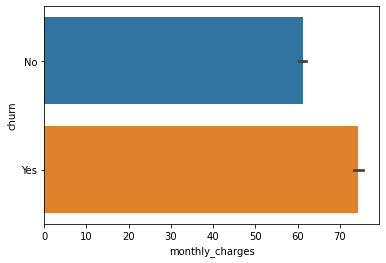

In [15]:
sns.barplot(x='monthly_charges', y='churn', data=df_telco)

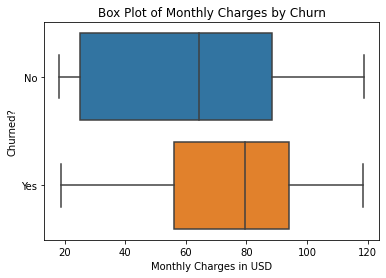

In [16]:
g = sns.boxplot(x='monthly_charges', y='churn', data=df_telco)
g.set(title= 'Box Plot of Monthly Charges by Churn', xlabel='Monthly Charges in USD', ylabel = 'Churned?')
g.get_figure().savefig('monthlycharges_box.svg')

<AxesSubplot:xlabel='tenure', ylabel='churn'>

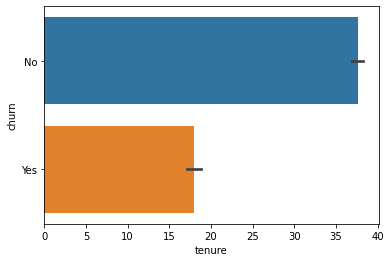

In [17]:
sns.barplot(x='tenure', y='churn', data=df_telco)

<AxesSubplot:xlabel='tenure', ylabel='churn'>

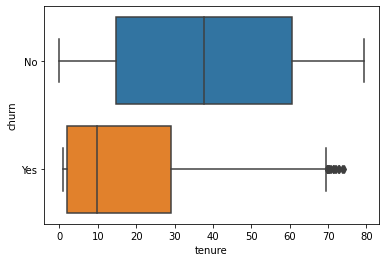

In [18]:
sns.boxplot(x='tenure', y='churn', data=df_telco)

Compare categorical data next

In [19]:
# gender proportions: basically even
df_churned['gender'].value_counts()

Female    940
Male      930
Name: gender, dtype: int64

In [20]:
#to get proportions:
percentizer = lambda x: x*100/sum(x)

<AxesSubplot:xlabel='churn'>

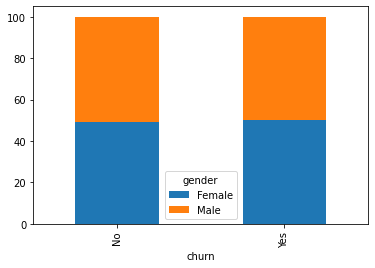

In [21]:
pd.crosstab(df_telco.churn, df_telco.gender).apply(percentizer, axis = 1).plot(kind='bar', stacked=True)

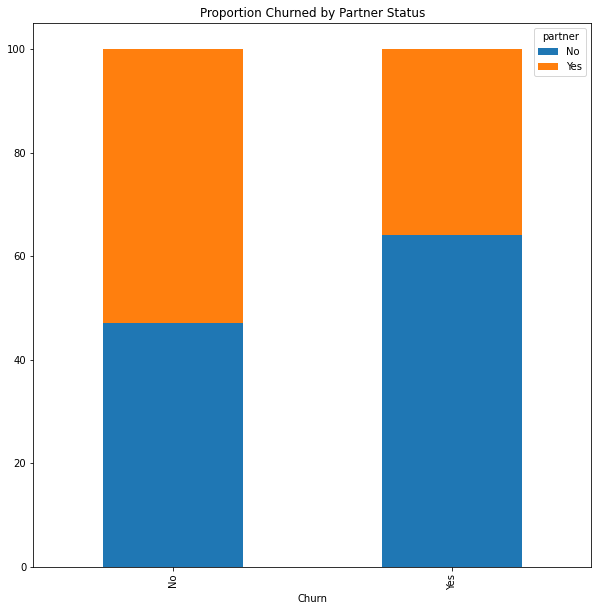

In [22]:
# partnered
df_churned.partner.value_counts()
pd.crosstab(df_telco.churn, df_telco.partner).apply(percentizer, axis = 1).plot(kind='bar', stacked=True, figsize=(10,10))
plt.title('Proportion Churned by Partner Status'),
plt.xlabel('Churn')
plt.savefig('partner_churn.svg')

In [23]:
pd.crosstab(df_telco.churn, df_telco.partner).apply(percentizer, axis = 1)

partner,No,Yes
churn,,
No,47.151960,52.848040
Yes,64.171123,35.828877


<AxesSubplot:xlabel='churn'>

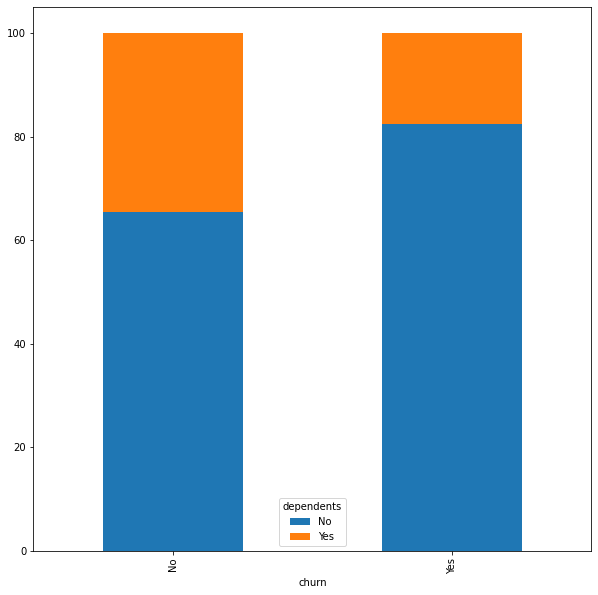

In [24]:
# dependents
pd.crosstab(df_telco.churn, df_telco.dependents).apply(percentizer, axis = 1).plot(kind='bar', stacked=True, figsize=(10,10))

In [25]:
pd.crosstab(df_telco.churn, df_telco.dependents).apply(percentizer, axis = 1)

dependents,No,Yes
churn,,
No,65.475961,34.524039
Yes,82.513369,17.486631


<AxesSubplot:xlabel='churn'>

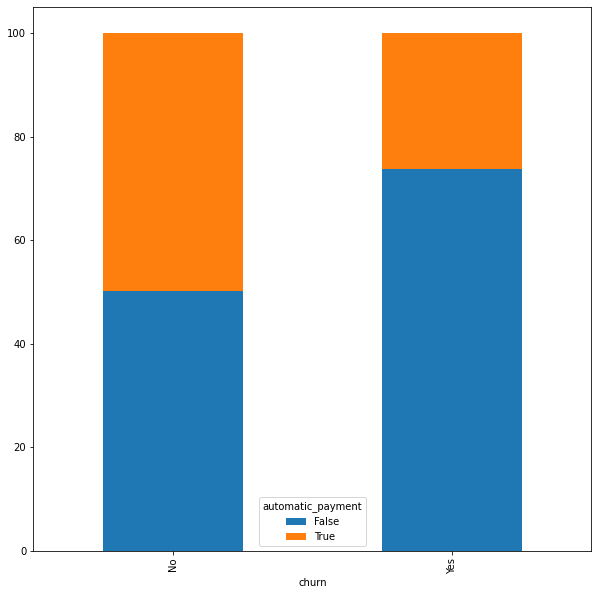

In [26]:
# payment type
pd.crosstab(df_telco.churn, df_telco.automatic_payment).apply(percentizer, axis = 1).plot(kind='bar', stacked=True, figsize=(10,10))

<AxesSubplot:xlabel='churn'>

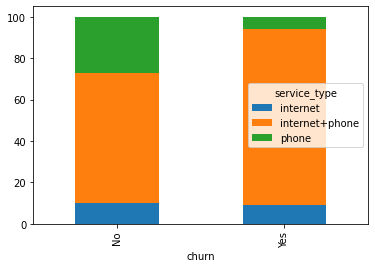

In [27]:
# service type
pd.crosstab(df_telco.churn, df_telco.service_type).apply(percentizer, axis = 1).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='churn'>

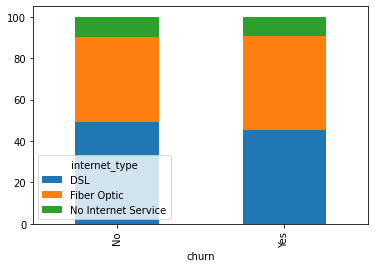

In [28]:
# internet type type
pd.crosstab(df_telco.churn, df_telco.internet_type).apply(percentizer, axis = 1).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='churn'>

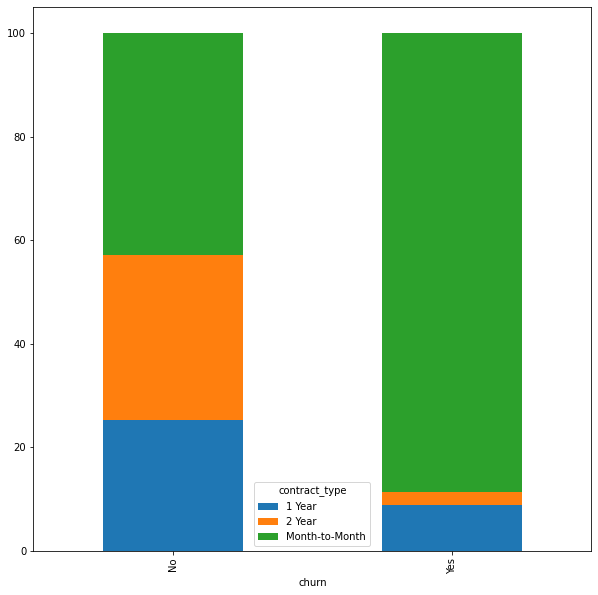

In [29]:
# contract type
pd.crosstab(df_telco.churn, df_telco.contract_type).apply(percentizer, axis = 1).plot(kind='bar', stacked=True,figsize=(10,10))

<AxesSubplot:xlabel='churn'>

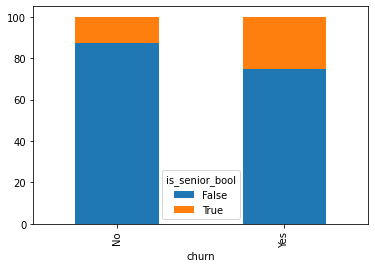

In [30]:
# senior citizen
pd.crosstab(df_telco.churn, df_telco.is_senior_bool).apply(percentizer, axis = 1).plot(kind='bar', stacked=True)

In [31]:
df_telco['internet_type'].value_counts()

DSL                    3395
Fiber Optic            2971
No Internet Service     683
Name: internet_type, dtype: int64

In [32]:
pd.crosstab(df_telco.churn, df_telco.is_senior_bool).apply(percentizer, axis = 1)

is_senior_bool,False,True
churn,,
No,87.140375,12.859625
Yes,74.545455,25.454545


- definitely looks like a churned customer is one paying month-to-month, without automatic payment, and with both internet and phone.
- demographic information looks like it is less prevalent of a pattern

## Are these hypotheses significant?
- compare percent churn in general population and the sub-samples

In [33]:
percent_churned = df_telco.has_churned.mean()
percent_churned

0.2652858561498085

In [95]:
# automatic payments are likely among churned customers
df_telco.groupby('has_churned').automatic_payment.value_counts()

has_churned  automatic_payment
False        False                2598
             True                 2581
True         False                1379
             True                  491
Name: automatic_payment, dtype: int64

In [96]:
# month-to-month customers are over represented
df_telco.groupby('has_churned').contract_type.value_counts()

has_churned  contract_type 
False        Month-to-Month    2220
             2 Year            1649
             1 Year            1310
True         Month-to-Month    1656
             1 Year             166
             2 Year              48
Name: contract_type, dtype: int64

In [36]:
df_telco.groupby('service_type').has_churned.mean()

service_type
internet          0.250366
internet+phone    0.327889
phone             0.073905
Name: has_churned, dtype: float64

In [37]:
df_telco.groupby('internet_type').has_churned.mean()

internet_type
DSL                    0.250074
Fiber Optic            0.286099
No Internet Service    0.250366
Name: has_churned, dtype: float64

In [38]:
df_telco.groupby('phone_type').has_churned.mean()

phone_type
No Phone Service     0.250366
One Line             0.250074
Two or More Lines    0.286099
Name: has_churned, dtype: float64

In [39]:
df_telco.groupby('partner').has_churned.mean()

partner
No     0.329489
Yes    0.196654
Name: has_churned, dtype: float64

In [40]:
df_telco.groupby('dependents').has_churned.mean()

dependents
No     0.312728
Yes    0.154610
Name: has_churned, dtype: float64

In [42]:
df_telco.groupby('is_senior_bool').has_churned.mean()

is_senior_bool
False    0.235991
True     0.416813
Name: has_churned, dtype: float64

In [41]:
df_telco.groupby('gender').has_churned.mean()

gender
Female    0.269264
Male      0.261383
Name: has_churned, dtype: float64

In [59]:
df_telco[(df_telco.contract_type == 'Month-to-Month') & (df_telco.has_churned)].describe()

,is_senior_citizen,monthly_charges,total_charges,tenure
count,1656.000000,1656.000000,1656.000000,1656.000000
mean,0.266304,72.993720,1163.775815,14.000845
std,0.442159,24.099529,1481.461332,15.860817
min,0.000000,18.850000,18.850000,1.000000
25%,0.000000,55.187500,93.962500,1.900000
50%,0.000000,79.025000,513.225000,7.400000
75%,1.000000,90.862500,1644.475000,21.125000
max,1.000000,117.450000,7548.100000,71.800000


In [65]:
df_telco[(df_telco.contract_type == 'Month-to-Month')].shape[0]/df_telco.shape[0]

0.5498652291105122

In [67]:
df_telco[df_telco.automatic_payment].shape[0]/df_telco.shape[0]

0.43580649737551425

In [69]:
df_telco.automatic_payment.mean()

0.43580649737551425

In [70]:
df_telco.churn.value_counts()

No     5179
Yes    1870
Name: churn, dtype: int64

In [80]:
df_telco[(df_telco.automatic_payment) & not (df_telco.has_churned)].count()

SyntaxError: invalid syntax (2515756867.py, line 1)